# Ciência dos Dados - Projeto 3

#### Bruno Bitelli e Leonardo Andrade, 2° B
_____

## Introdução: 

Neste trabalho será realizada uma análise de regressão múltipla. Como variável resposta foi escolhida a taxa de adultos empregados de diferentes países, e como variáveis explicativas a idade mediana e o PIB per capita de cada um deles. Realizaremos uma análise descritiva dos dados obtidos via Gapminder, com o intuito de responder a seguinte pergunta:

       Como a idade da maioria da população e seu PIB/capita podem afetar a taxa de pessoas empregadas em um país?

## Construção da base de dados:

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os

In [13]:
dados_mortalidade_infantil = pd.read_excel("under5mortality.xlsx", index_col = 0)
dados_gastos_governo = pd.read_excel("indicator_per-capita-government-expenditure-on-health-at-average-exchange-rate-us.xlsx", index_col = 0)
dados_fertilidade = pd.read_excel("total_fertility.xlsx", index_col = 0)

In [14]:
mortalidade_infantil = dados_mortalidade_infantil.iloc[:,216:217]

In [15]:
mortalidade_infantil.head()

,mortalidade_infantil_2010
Under five mortality,
Abkhazia,NaN
Afghanistan,2.021189
Akrotiri and Dhekelia,NaN
Albania,2.809403
Algeria,3.310543


In [16]:
gastos_governo = dados_gastos_governo.iloc[:, 16:17]

In [17]:
gastos_governo.head()

,gastos_governo_2010
Per capita government expenditure on health at average exchange rate (US$),
Abkhazia,NaN
Afghanistan,1.479422
Akrotiri and Dhekelia,NaN
Albania,4.543546
Algeria,4.933329


In [18]:
fertilidade = dados_fertilidade.iloc[:,216:217]

In [19]:
fertilidade.head()

,fertilidade_2010
Total fertility rate,
Abkhazia,NaN
Afghanistan,1.733424
Akrotiri and Dhekelia,NaN
Albania,0.553885
Algeria,1.036737


In [20]:
dados = mortalidade_infantil.join(gastos_governo, how='outer')
dados = dados.join(fertilidade, how='outer')

In [21]:
dados = dados[~np.isnan(dados.mortalidade_infantil_2010)]
dados = dados[~np.isnan(dados.gastos_governo_2010)]
dados = dados[~np.isnan(dados.fertilidade_2010)]
dados.head()

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
Afghanistan,2.021189,1.479422,1.733424
Albania,2.809403,4.543546,0.553885
Algeria,3.310543,4.933329,1.036737
Angola,5.206750,4.620960,1.827770
Antigua and Barbuda,2.292535,6.193294,0.756122


In [22]:
dados.tail()

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
Vanuatu,3.349904,4.959797,1.252763
Venezuela,2.809403,5.444660,0.904218
Vietnam,3.210844,3.445529,0.598837
Yemen,4.074142,2.725867,1.504077
Zambia,4.440296,3.782644,1.759581


In [24]:
dados.shape

(176, 3)

## Análise descritiva

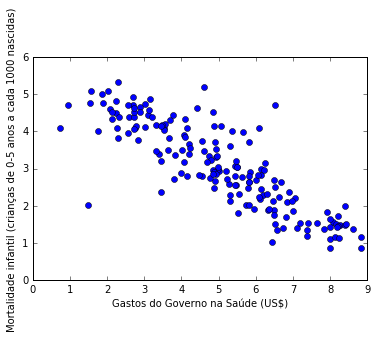

In [26]:
# Plotando os gráficos de dispersão.
plt.plot(dados.gastos_governo_2010,dados.mortalidade_infantil_2010,'o')
plt.xlabel('Gastos do Governo na Saúde (US$)')
plt.ylabel("Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)")

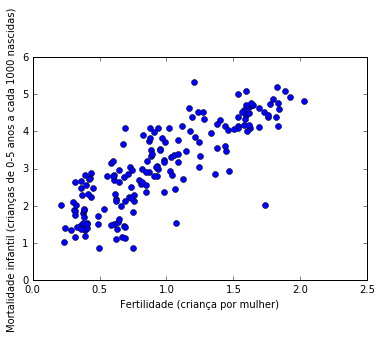

In [27]:
plt.plot(dados.fertilidade_2010,dados.mortalidade_infantil_2010,'o')
plt.xlabel("Fertilidade (criança por mulher)")
plt.ylabel("Mortalidade infantil (crianças de 0-5 anos a cada 1000 nascidas)")

In [28]:
# Verificando a correlação entre as variáveis.
dados.corr(method='pearson')

,mortalidade_infantil_2010,gastos_governo_2010,fertilidade_2010
mortalidade_infantil_2010,1.000000,-0.853822,0.830466
gastos_governo_2010,-0.853822,1.000000,-0.726404
fertilidade_2010,0.830466,-0.726404,1.000000
